In [ ]:
# Clustering topics using partitioning-based algorithms, in particular K-Means

In [84]:
# Set the class of tweets specifying the correct file
import pandas as pd
df_model = pd.read_csv('../data/negative_post_rebalancing.csv')

In [86]:
# Set the proper range of dates to analyze
df_model_old = df_model.loc[df_model['Datetime'] >= '2022-05-14']
df_model_old = df_model.loc[df_model['Datetime'] <= '2022-05-18']

In [88]:
import pandas as pd
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = df_model_old.Text.values
vectorizer = TfidfVectorizer(stop_words = stop_words,max_features = 1000)
X = vectorizer.fit_transform(desc)
words = vectorizer.get_feature_names()

In [89]:
df_model = pd.DataFrame(X.toarray(),columns=words)

In [85]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score, silhouette_samples
import seaborn as sns

def show_silhouette_scores(clusters, k):
    score = silhouette_score(df_model, clusters, metric='euclidean')
    print('Silhouette Score: %.3f' % score)
    sample_silhouette_values = silhouette_samples(df_model, clusters)
    means_lst = []
    for label in range(k):
        means_lst.append(sample_silhouette_values[clusters == label].mean())
    print("Silhouette mean for each cluster:",means_lst)
    sample_silhouette_values = silhouette_samples(df_model, clusters)
    print("Std of silhouette mean:",np.std(means_lst))
    print("Number of negative silhouette values:",np.sum(sample_silhouette_values < 0, axis=0))

def show_clusters_size(clusters):
    unique, counts = np.unique(clusters, return_counts=True)
    print(dict(zip(unique, counts)))

# K-Means

In [90]:
# Choosing the range to explore
ks = range(2,7)

In [91]:
distortions = []
for i in ks:
    km = KMeans(n_clusters=i, init='k-means++')
    palette = sns.color_palette('Set1', i)
    Clusters = km.fit_predict(df_model)
    print(i)
    distortions.append(km.inertia_)

2
3
4
5
6


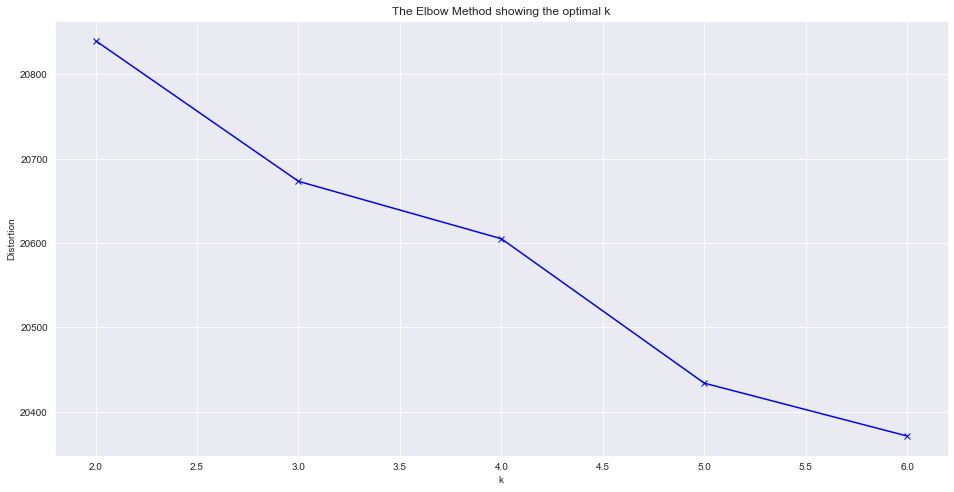

In [92]:
# Plot the Elbow method's graph
plt.figure(figsize=(16,8))
plt.plot(ks, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [93]:
# Best K for KMeans obtained analysing the Elbow plot
bestK = 3

In [94]:
km = KMeans(n_clusters=bestK)
Clusters = km.fit_predict(df_model)
df_model_old['Class'] = Clusters

In [96]:
df_model_old.to_csv("KMeans0514.csv",index=False)